
# Lecture 12 - Bagging and Boosting

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

## <img src="https://img.icons8.com/color/32/000000/fork-lift.png"/> Loading packages

In [0]:
!pip install vecstack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19877 sha256=e145f28ae5f4baefdd0992c7d1882ce1812e0d1ce2a1715d28e1cf6270138859
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


## <img src="https://img.icons8.com/color/32/000000/accept-database.png"/> Prepare a dataset

In [0]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

### <img src="https://img.icons8.com/color/32/000000/hashtag-activity-feed-2.png"/>  Get attributes and class labels

In [0]:
# split X and y
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

### <img src="https://img.icons8.com/color/32/000000/123.png"/> Encode labels

In [0]:
# encode class labels
le = LabelEncoder()
y = le.fit_transform(y)

### <img src="https://img.icons8.com/color/32/000000/split-files.png"/> Split into train and test sets

In [0]:
# split train and test
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

***
# <img src="https://img.icons8.com/color/32/000000/overview-pages-4.png"/> Overview
***

* **Bagging** to decrease the model’s variance
* **Boosting** to decreasing the model’s bias
* **Stacking** to increasing the predictive force of the classifier

***
# <img src="https://img.icons8.com/color/32/000000/chalk-bag.png"/> Bagging
***

In **bagging** we draw bootstrap samples (random samples with replacement) from the training set.  Bagging is also known as **B**ootstrap **AGG**regat**ING**.

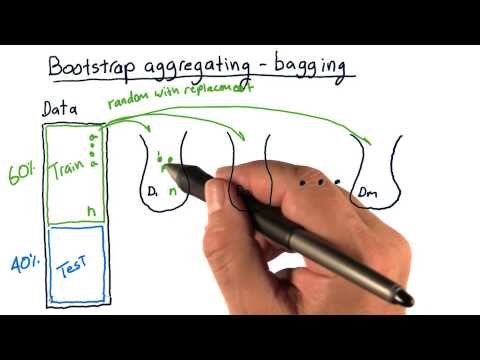

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('2Mg8QD0F1dQ')

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch07/images/07_06.png?raw=true)

## <img src="https://img.icons8.com/color/32/000000/overview-pages-2.png"/> Overview of bagging

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch07/images/07_07.png?raw=true)

## <img src="https://img.icons8.com/color/32/000000/term.png"/>  Bagging example

#### <img src="https://img.icons8.com/color/32/000000/serial-tasks.png"/> Define models

In [0]:
# create Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

# build bagger
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

#### <img src="https://img.icons8.com/color/32/000000/test-tube.png"/> Train and test

In [0]:
# train decision tree
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.833


In [0]:
# train bagger
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.917


> Note: the Bagger generalized better to the test set compared to the Decision Tree alone.

#### <img src="https://img.icons8.com/color/32/000000/opposite-opinion.png"/> Compare decision regions

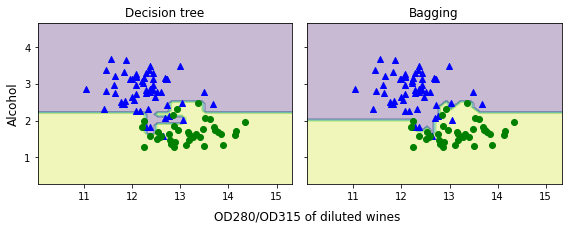

In [0]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)
plt.show()

***
# <img src="https://img.icons8.com/color/32/000000/launched-rocket.png"/> Adaptive boosting
***

In **boosting** the ensemble consists of very simple base classifiers (weak learners), which only have a slight performance advantage over randoming guessing.  

Boosting focuses on training examples that are hard to classify.  The weak learners subsequently learn from the the misclassified training examples to improve performance of the ensemble. 


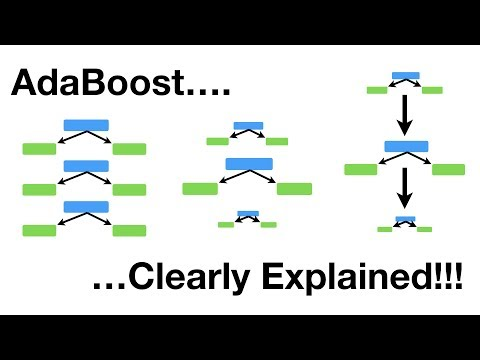

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('LsK-xG1cLYA')

1. Draw random subset of training examples $d_1$ without replacement from the training set $D$ to train weak learner $C_1$.
1. Draw a second random training subset $d_2$ without replacement from the training set $D$ and add 50% of the examples previously misclassified to train weak learner $C_2$.
1. Find the training examples $d_3$ in the training set $D$ in which $C_1$ and $C_2$ disagree to train a weak learner $C_3$.
4. Combine the weak learners $C_1, C_2$ and $C_3$ via majority voting.

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch07/images/07_09.png?raw=true)

## <img src="https://img.icons8.com/color/32/000000/overview-pages-2.png"/> Overview of boosting

1. Set the weight vector $\mathbf{w}$ to uniform weights where $\sum_i w_i = 1$.
2. For $j$ in $m$ boosting rounds, do:
  * Train a weighted weak learner: $C_j = \text{train}(\textbf{X, y, w})$.
  * Predict class labels: $\hat{y} = \text{predict}(C_j, \textbf{X})$.
  * Compute weighted error rate: $\epsilon = \textbf{w} \cdot (\hat{\textbf{y}} \ne \textbf{y}) $.
  * Compute coefficient: $\alpha_j = 0.5 \log {{1 - \epsilon}\over \epsilon}$
  * Update weights: $\textbf{w} := \textbf{w} \times \exp(-\alpha_j \times \hat{\textbf{y}} \times {\textbf{y}})$
  * Normalize weights to sum to 1: $\textbf{w} := \textbf{w} / \sum_i w_i $.
3. Compute the final predictions $\hat{\textbf{y}} = \Big(\sum_{j=1}^m \big(\alpha_j \times \text{predict}(C_j, \textbf{X})\big) >  0 \Big)$.

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch07/images/07_10.png?raw=true)

## <img src="https://img.icons8.com/color/32/000000/term.png"/> AdaBoost example

#### <img src="https://img.icons8.com/color/32/000000/serial-tasks.png"/> Define models

In [0]:
# build Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

# build AdaBoost
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

#### <img src="https://img.icons8.com/color/32/000000/test-tube.png"/> Train and test

In [0]:
# train Decision Tree
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# test Decision Tree
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 0.916/0.875


In [0]:
# train AdaBoost
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# test AdaBoost
ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.917


> Note: AdaBoost generalized better to the test set compared to the Decision Tree alone.

#### <img src="https://img.icons8.com/color/32/000000/opposite-opinion.png"/> Compare decision regions

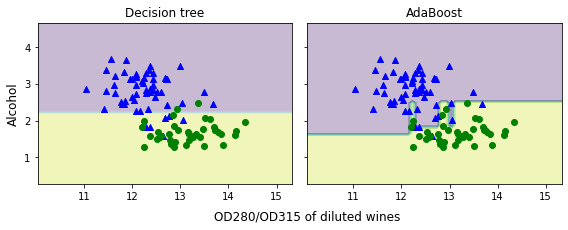

In [0]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)
plt.show()

<br>
<br>

***
#  <img src="https://img.icons8.com/color/32/000000/sheets.png"/> Stacking
***

In **stacking** we select one or more models in the first level, make predictions using these models, then use the predictions as features to fit one or more second levels models on top. 

To avoid overfitting, use cross-validation to predict the out-of-fold (OOF) part of the training set.  

![alt text](https://miro.medium.com/max/1318/1*9uCwjY5uRkRrX2VNST7R0w.gif)

## <img src="https://img.icons8.com/color/32/000000/term.png"/> Stacking example

In [0]:
# define models
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [0]:
# run stacking
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False,      
                           mode='oof_pred_bag',        
                           needs_proba=False,         
                           save_dir=None,             
                           metric=accuracy_score,     
                           n_folds=4,                  
                           stratified=True,            
                           shuffle=True,              
                           random_state=1,
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.95833333]
    fold  1:  [0.87500000]
    fold  2:  [0.75000000]
    fold  3:  [0.86956522]
    ----
    MEAN:     [0.86322464] + [0.07423669]
    FULL:     [0.86315789]

model  1:     [RandomForestClassifier]
    fold  0:  [0.91666667]
    fold  1:  [0.95833333]
    fold  2:  [0.79166667]
    fold  3:  [0.78260870]
    ----
    MEAN:     [0.86231884] + [0.07667774]
    FULL:     [0.86315789]

model  2:     [XGBClassifier]
    fold  0:  [0.91666667]
    fold  1:  [0.95833333]
    fold  2:  [0.79166667]
    fold  3:  [0.86956522]
    ----
    MEAN:     [0.88405797] + [0.06189982]
    FULL:     [0.88421053]



In [0]:
# fit the second level model
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: %.8f' % accuracy_score(y_test, y_pred))

Final prediction score: 0.91666667


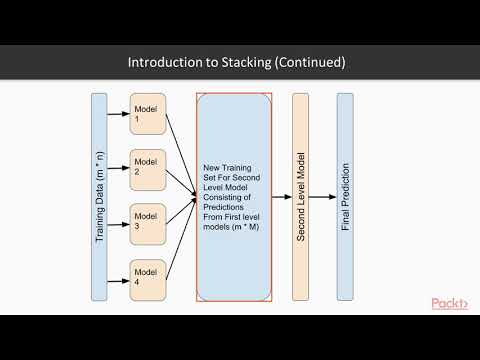

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('DCrcoh7cMHU')

<br>
<br>